In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Dans ce TP, nous allons programmer de différentes méthodes composées d'intégration numérique. Nous les testerons sur les fonctions suivantes :
\begin{align}
f_1(x) &= \exp(-x^2),&
f_2(x) &= \sqrt{\sin x},\\
%f_2(x) &= 0.1 \,(1+x/3)^3 \log(1+x),&
%f_3(x) &= \sin(2\pix) / (1.1 - \sin(\pix)).
\end{align}

**Question 1.**

> Définissez ces fonctions et tracez les sur l'intervalle $[0, 3]$.

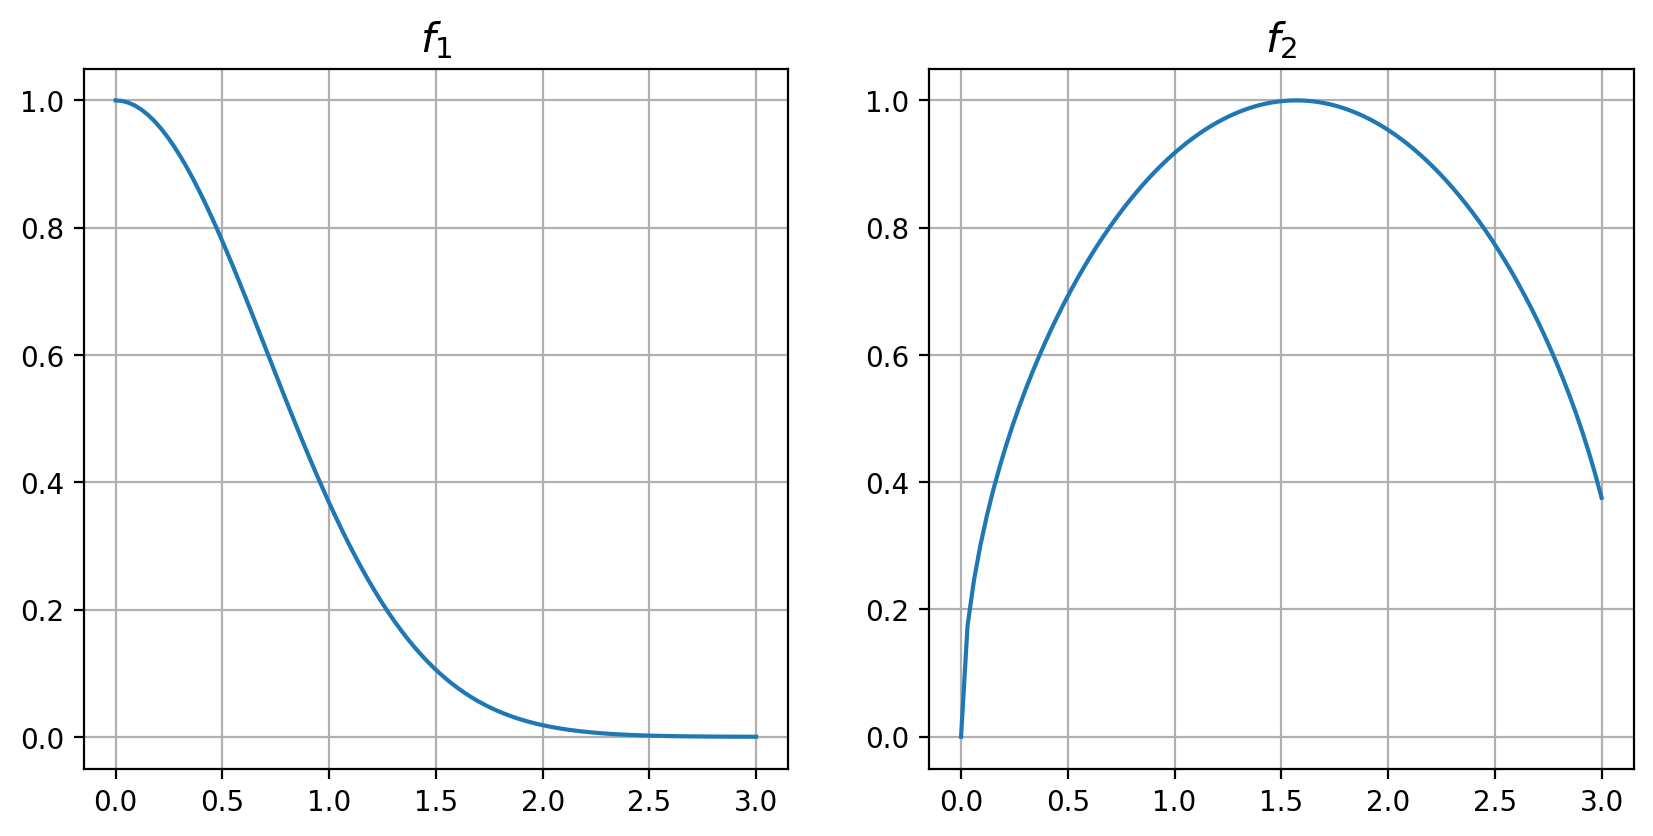

In [4]:
f = [
    lambda x: np.exp(-x**2),
    lambda x : np.sqrt(np.sin(x)),
]
xx = np.linspace(0,3,100)
fig = plt.figure(figsize = (10,10))
    
for i,fi in enumerate(f):
    ax = fig.add_subplot(2,2,i+1)
    ax.plot(xx,fi(xx))
    ax.set_title(f'$f_{i+1}$',fontsize = 15)
    ax.grid(True)

Etant donnée un intervalle $ [ a, b ] $, on considère une subdivision de cet intervalle en $ m $ sous-intervalles de longueur $ h = \frac{ b - a }{ m } $: $ a = a_0 < a_1 < a_2 < \ldots < a_m = b $ avec $ a_j = a + j h $, $ j = 0, 1, \ldots, m $.

## Méthode des rectangles à gauche

La formule des rectangles à gauche consiste à faire l'approximation

\begin{equation}
I = \int_{a}^{b} f( x ) dx \approx h \sum_{ j = 0 }^{ m - 1 } f( a_i ).
\end{equation}

**Question 2.** 

> Sur une feuille de papier, tracer la fonction $f_1$ sur l'intervalle $[0, 3]$ et illustrer la méthode des rectangles à gauche pour la subdivision $0 < 0.5 < 1 < 1.5 < 2 < 2.5 < 3$. En déduire une approximation  de $\int_{0}^{3} f_1$. 

(Vous pouvez également faire ce dessin avec Python à l'aide de la fonction `bar` de `matplotlib.pyplot`.)

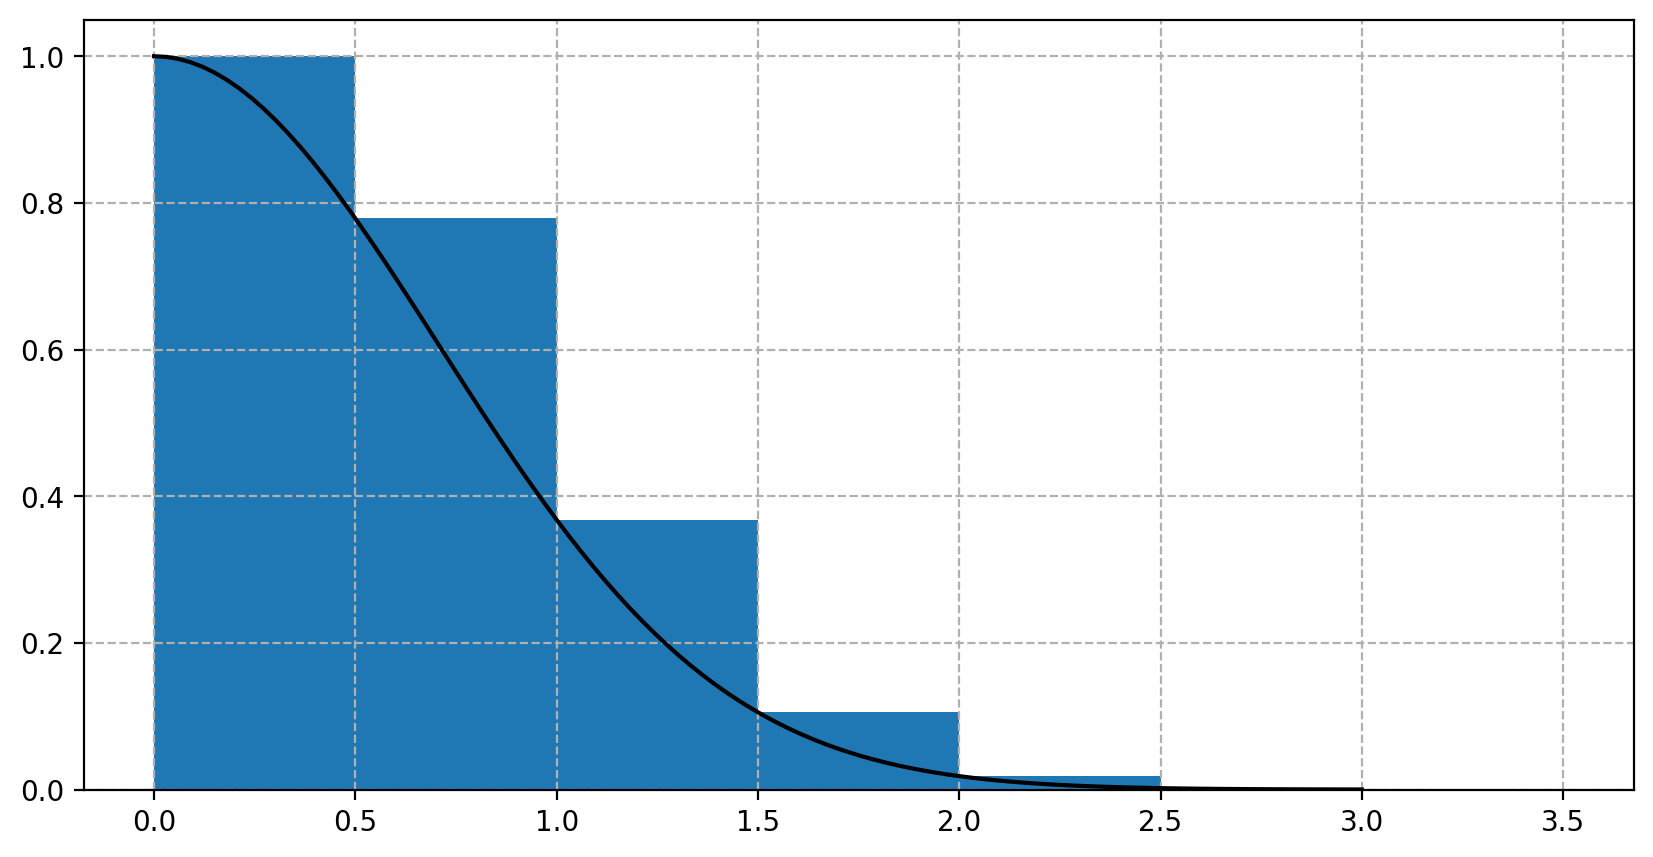

In [5]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

a = np.linspace(0,3,7)

ax.bar(a,f[0](a),align = 'edge', width = 0.5) 
ax.plot(xx,f[0](xx), color='black')
ax.grid(True, linestyle='--')

**Question 3.**

> 1. En utilisant la fonction `sum` du module `numpy`, programmez une fonction `quad_rectg(f,x)` qui prend en argument une fonction `f` et un `ndarray` `x` qui contient une subdivision $a_0 < \ldots <a_m$ d'un intervalle $[a,b]$, et retourne la valeur approchée de $I$ obtenue par la formule des rectangles à gauche.
> 2. Tester ensuite votre méthode sur $f_1$ avec la subdivision de la question 2, et vérifier que le résultat est cohérent avec votre approximation grossière.

In [6]:
def quad_rectg(f,x):
    h = x[1] - x[0]                # on peut écrire x[1:] - x[:-1]
    return h * np.sum(f(x[:-1]))   # on aura des points équirépartis

In [7]:
quad_rectg(f[0],a)

1.1361627709148368

**Question 4.**

> 1. Comparez la valeur approchée de $I$ obtenue à l'aide de la fonction `quad_rectg` avec sa valeur calculée à l'aide de la fonction `quad` de `scipy.integrate` (en choissisant une erreur absolue `epsabs = 1e-14`) pour des subdivisions de différents pas $h = 1/2, 1/4,1/8, \ldots, 2^{-8}$. Que se passe-t-il quand $h$ diminue ?
> 2. Tracer l'erreur entre l'intégrale approchée et la valeur "exacte" (obtenue via `quad`) en fonction de $h$ en échelle log-log. Qu'observez-vous ? Calculer la pente de la droite obtenue. 

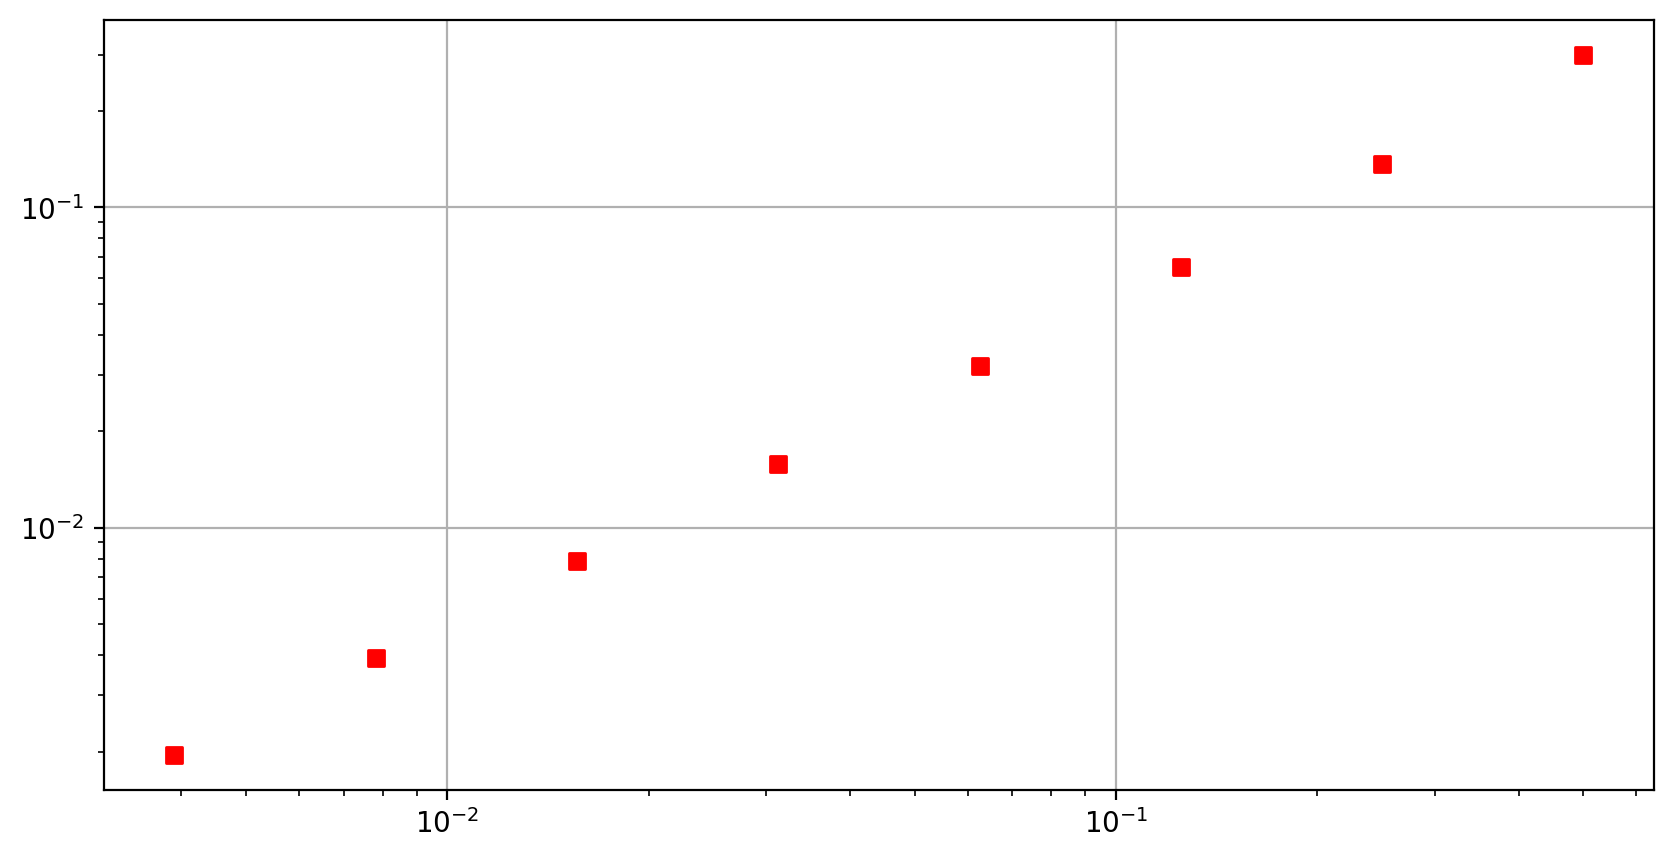

In [35]:
h = 0.5**np.arange(1,9)
v = quad(f[0],0.,3.,epsabs = 1e-14)[0]
erreur = np.zeros(h.shape)

for k,hk in enumerate(h):
    x = np.linspace(0 , 3 , int(3/hk))
    erreur[k] = np.abs(quad_rectg(f[0],x) - v)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(h,erreur,color ='r' , marker = 's' )
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')

**Question 4bis (facultative).**

On souhaite généraliser la réponse à la question 4 et calculer l'ordre de convergence à l'aide d'une régression linéaire. Cette question est facultative mais peut vous faire gagner du temps pour la suite.

> 1. Écrivez une fonction `error(f, a, b, method)` qui prend en argument une fonction `f`,  les bornes de  l'intervalle d'intégration $[a, b]$ et une methode d'intégration `method` qui est une fonction du même type que  `quad_rectg`.
La fonction `error` doit calculer l'erreur $e$ de la méthode pour des subdivisions de différents pas $h = 1/2, 1/4,1/8, \ldots, 2^{-8}$. Elle doit renvoyer un tableau `h` qui contient les différents pas $h$ et un tableau `e` contenant l'erreur obtenue pour chacun de ces pas.
> 2. Utilisez cette methode avec $f = f_1$, $a =0$, $b=3$ et `method = quad_rectg` pour vérifier que vous obtenez le même résultat qu'à la question 4.

In [120]:
def error(f, a, b, method):
    h_tab = 0.5**np.arange(1,9)
    err_tab = np.zeros(h_tab.shape)
    l_ex = quad(f, a, b, epsabs = 1e-14)[0]
    for k,hk in enumerate(h):
        x = np.linspace(0 , 3 , int(3/hk))
        err_tab[k] = np.abs(method(f,x) - l_ex)
    return (f'h = {h_tab}',
           f'e = {err_tab}',)

In [121]:
print(error(f[0], 0, 3, quad_rectg))

('h = [0.5        0.25       0.125      0.0625     0.03125    0.015625\n 0.0078125  0.00390625]', 'e = [0.29994411 0.13634238 0.0652083  0.0319107  0.01578746 0.00785242\n 0.00391596 0.00195543]')


> 3. Écrivez une fonction `plot_error(f, a, b, method_list, title)` qui prend en argument une fonction `f`,  les bornes de  l'intervalle d'intégration $[a, b]$, une __liste__ de methode d'intégration `method_list` qui sont des fonctions du même type que  `quad_rectg` et une chaine de charactère `title`.
La fonction `plot_error` doit tracer l'erreur en fonction de $h$ en échelle log-log. Le titre de la figure doit etre donné par `title`. Elle doit renvoyer un tableau avec coefficient directeur de la droite obtenue pour chaque methode, calculé avec une methode de régression linéaire. Vous pouvez utiliser la fonction `linregress` du module `scipy.stat` pour calculer la pente.
> 4. Vérifier votre fonction en comparant avec la question 4. 
   
_Astuce_ : Vous pouvez utiliser `objet.__name__` pour retrouver le nom donné à n'importe quel objet python. Très pratique pour mettre des labels dans vos graphes. 
   

In [ ]:
def plot_error(f, a, b, method_list, title):
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    slope = {}
    for i,method in enumerate(method_list):
        h,e = error(f, a, b, method)
        ax.scatter(h,e)

## Méthode des trapèzes
On rappelle que la formule des trapèzes consiste à faire l'approximation

\begin{equation}
\int_{a}^{b} f( x ) dx \approx h \sum_{j=0}^{m-1} \frac{1}{2} \Bigl(  f(a_j)+f(a_{j+1}) \Bigr) =h \Bigl[\frac{1}{2} \Bigl( f(a)+f(b) \Bigr) + \sum_{j=1}^{m-1} f(a_j) \Bigr]
\end{equation}

**Question 5.**

> 1. Reprenez la question 2 avec la méthode des trapèzes.
> 2. Programmez une fonction `quad_trapeze(f,x)` qui prends un argument une fonction `f` et un `ndarray` `x` qui contient une subdivision $a_0 < \ldots <a_m$ d'un intervalle $[a,b]$, et retourne la valeur approchée de $I$ obtenue par la formule des trapèzes.
> 3. Comparez la méthode des trapèzes à la méthode des rectangles en traçant sur une même figure les erreurs en fonction du pas $h$ en echelle log-log. Laquelle est la plus satisfaisante ?

In [66]:
def quad_trapeze(f,x):
    return 0.5 * (x[1:] - x[:-1]) @ (f(x[:-1]) + f(x[1:]))

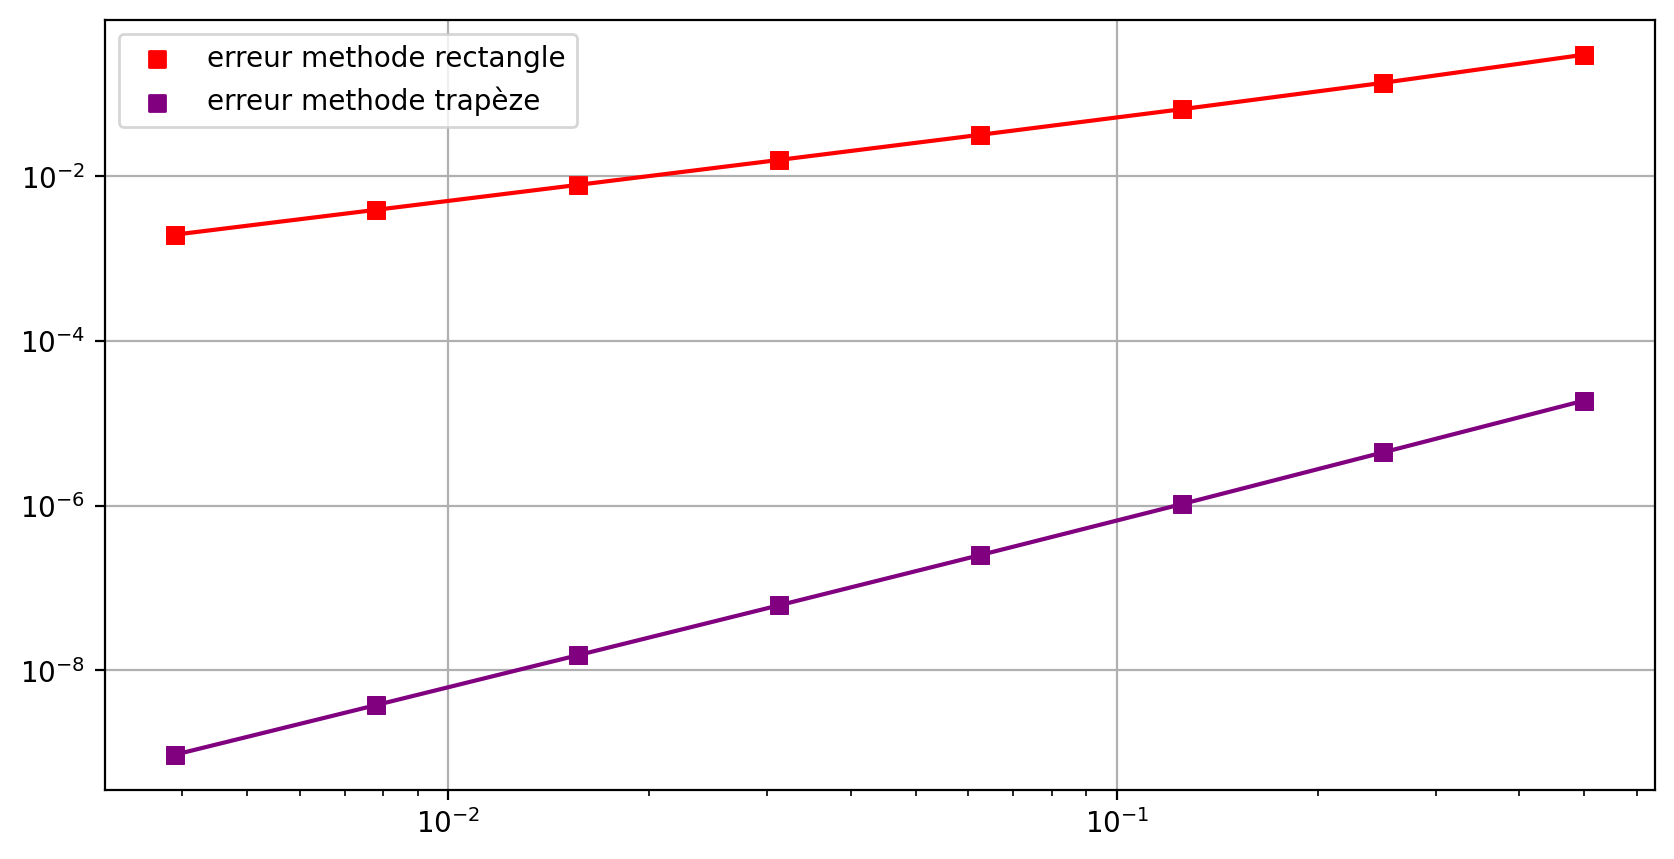

In [67]:
h = 2**(-np.linspace(1,8,8))
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
v = quad(f[0],0.,3.,epsabs = 1e-14)[0]
erreur_t = np.zeros(h.shape)
erreur_r = np.zeros(h.shape)

for k,hk in enumerate(h):
    x = np.linspace(0 , 3 , int(3/hk))
    u = quad_trapeze(f[0],x)
    erreur_t[k] = np.abs(v- u)
    erreur_r[k] = np.abs(quad_rectg(f[0],x) - v)

ax.scatter(h,erreur_r,color ='r' , marker = 's', label = "erreur methode rectangle" )
ax.plot(h,erreur_r,color ='r' , marker = 's' )
ax.scatter(h,erreur_t,color ='purple' , marker = 's',label = "erreur methode trapèze" )
ax.plot(h,erreur_t,color ='purple' , marker = 's' )
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

## Méthode du point milieu
On rappelle que la formule du point milieu consiste à faire l'approximation

\begin{equation}
\int_{a}^{b} f(x)dx \approx h \sum_{j=0}^{m-1} f(a_{j+{1}/{2}}), \quad \text{où} \quad a_{ j+{1}/{2} } = \frac{ a_j + a_{j+1} }{ 2 }.
\end{equation}

**Question 6.**
> 1. Programmez une fonction `quad_milieu(f,x)` qui prends un argument une fonction `f` et un `ndarray` `x` qui contient une subdivision $a_0 < \ldots <a_m$ d'un intervalle $[a,b]$, et retourne la valeur approchée de $I$ obtenue par la formule du point milieu.
> 2. Comparez cette méthode à celle des trapèzes en traçant sur une même figure les erreurs en fonction du pas $h$ en echelle log-log. L'une des deux méthodes est-elle plus intéressante ?

In [90]:
def quad_milieu(f, x):
    return 0.5*(x[1:] - x[:-1]) @ f(0.5* (x[:-1]) + (x[1:]))

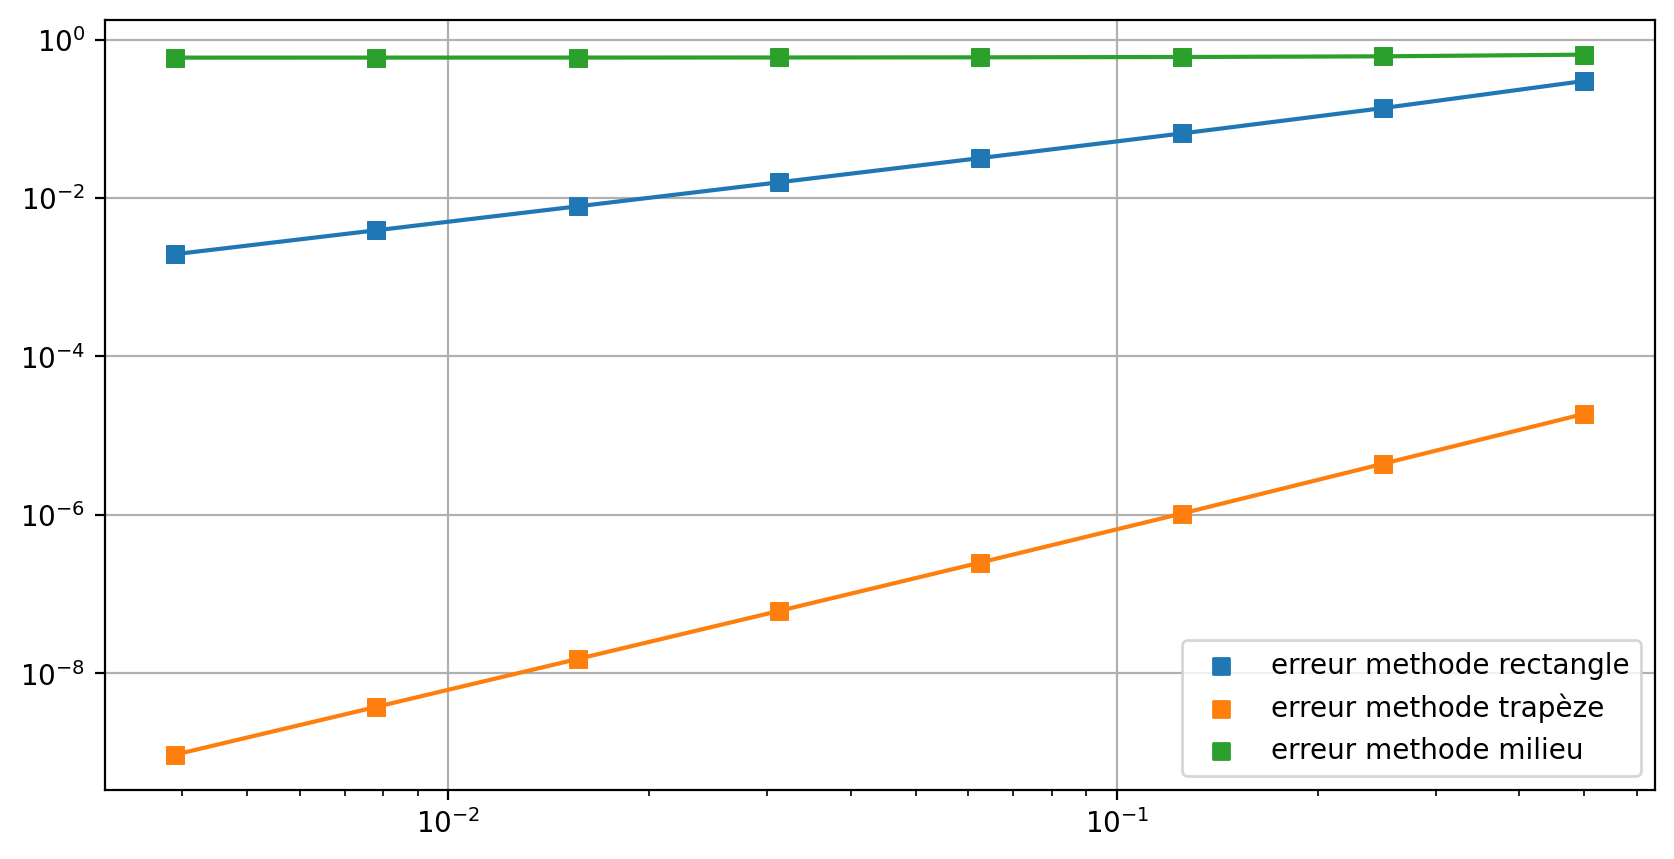

In [98]:
h = 2**(-np.linspace(1,8,8))
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
v = quad(f[0],0.,3.,epsabs = 1e-14)[0]
erreur_r = np.zeros(h.shape)
erreur_t = np.zeros(h.shape)
erreur_pm = np.zeros(h.shape)

for k,hk in enumerate(h):
    x = np.linspace(0 , 3 , int(3/hk))
    u = quad_milieu(f[0],x)
    erreur_r[k] = np.abs(quad_rectg(f[0],x) - v)
    erreur_t[k] = np.abs(quad_trapeze(f[0],x)- v)
    erreur_pm[k] = np.abs(u - v)

ax.scatter(h,erreur_r, marker = 's', label = "erreur methode rectangle" )
ax.plot(h,erreur_r, marker = 's' )
ax.scatter(h,erreur_t , marker = 's',label = "erreur methode trapèze" )
ax.plot(h,erreur_t , marker = 's' )
ax.scatter(h,erreur_pm , marker = 's',label = "erreur methode milieu" )
ax.plot(h,erreur_pm , marker = 's' )
ax.grid(True)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

## Méthode de Simpson
On rappelle la formule de Simpson qui consiste à faire l'approximation

\begin{equation}
\int_{a}^{b} f( x ) dx \approx h \sum_{j=0}^{m-1} 
\frac{1}{6} \Bigl( f(a_j)+4f(a_{j+{1}/{2}})+f(a_{j+1}) \Bigr).
\end{equation}

**Question 7.**
> 1. Programmez une fonction `quad_simpson(f,x)` qui prend en argument une fonction `f` et un `ndarray` `x` qui contient une subdivision  $ a_0 < \ldots < a_m $  d'un intervalle  $[a,b]$, et retourne la valeur approchée de $I$  obtenue par la formule de Simpson. Comparer avec les méthodes précédentes et commenter.